# <center> Final Term Project 

<center> DSC-530

<center> Kalyan Pothineni

In [1]:
# Import the libraries as needed

import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Load the dataset
heart_data = pd.read_csv('Heart_Attack.csv')
heart_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [65]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
 9   class_encoded  1319 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 103.2+ KB


In [66]:
heart_data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
class_encoded    0
dtype: int64

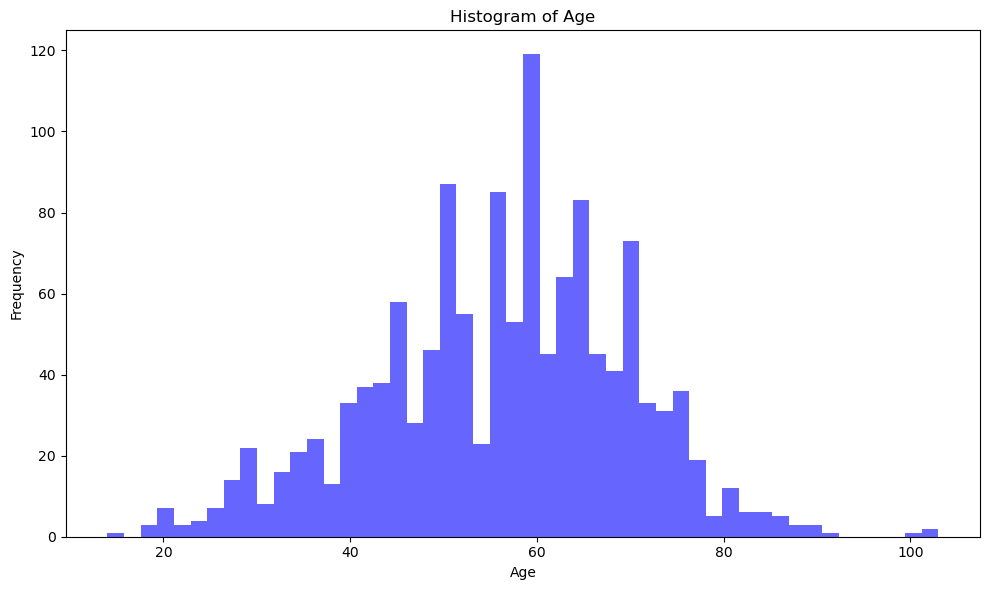

In [8]:
# Plot histogram for 'age'
plt.figure(figsize=(10, 6))
plt.hist(heart_data['age'], bins=50, color='blue', alpha=0.6)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

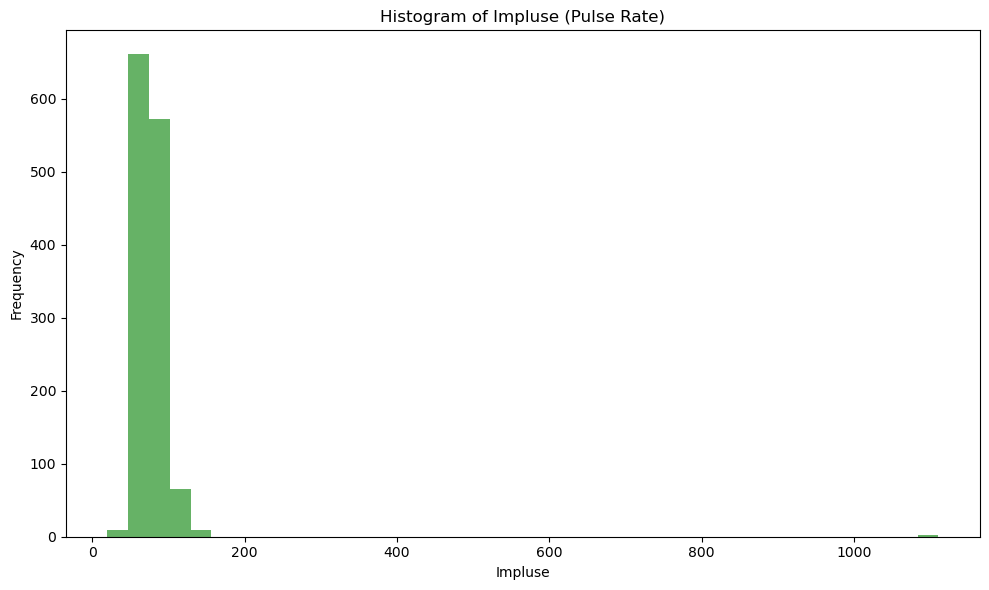

In [11]:
# Plot histogram for 'impluse'
plt.figure(figsize=(10, 6))
plt.hist(heart_data['impluse'], bins=40, color='green', alpha=0.6)
plt.title('Histogram of Impluse (Pulse Rate)')
plt.xlabel('Impluse')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

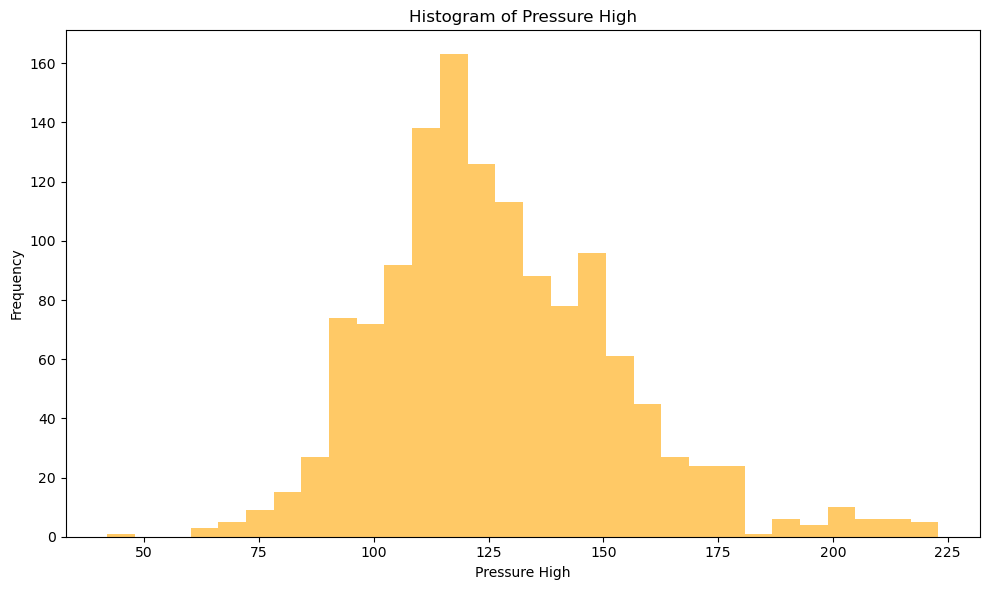

In [15]:
# Plot histogram for 'pressurehight'
plt.figure(figsize=(10, 6))
plt.hist(heart_data['pressurehight'], bins=30, color='orange', alpha=0.6)
plt.title('Histogram of Pressure High')
plt.xlabel('Pressure High')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

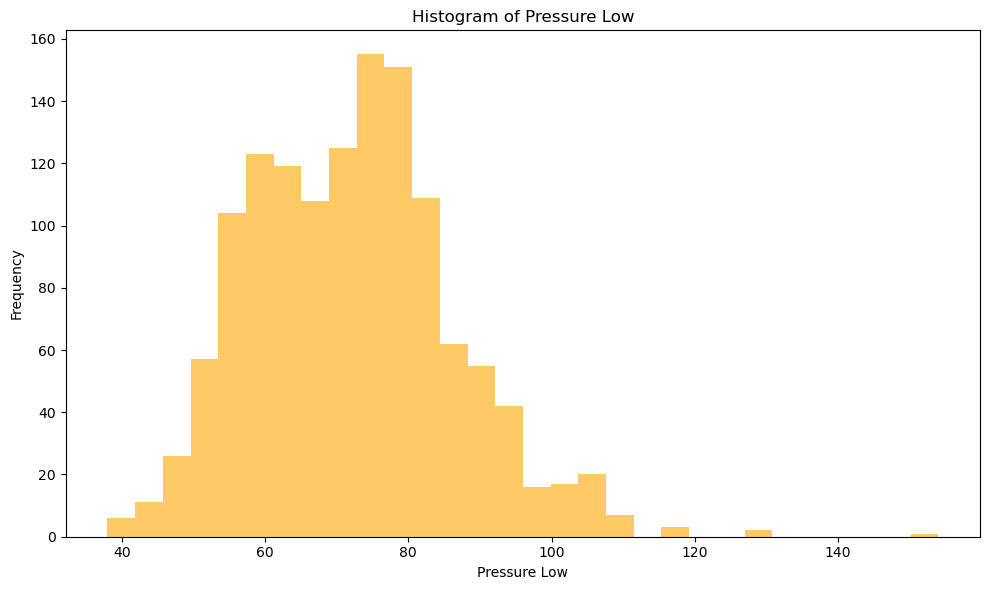

In [20]:
# Plot histogram for 'pressurehight'
plt.figure(figsize=(10, 6))
plt.hist(heart_data['pressurelow'], bins=30, color='orange', alpha=0.6)
plt.title('Histogram of Pressure Low')
plt.xlabel('Pressure Low')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

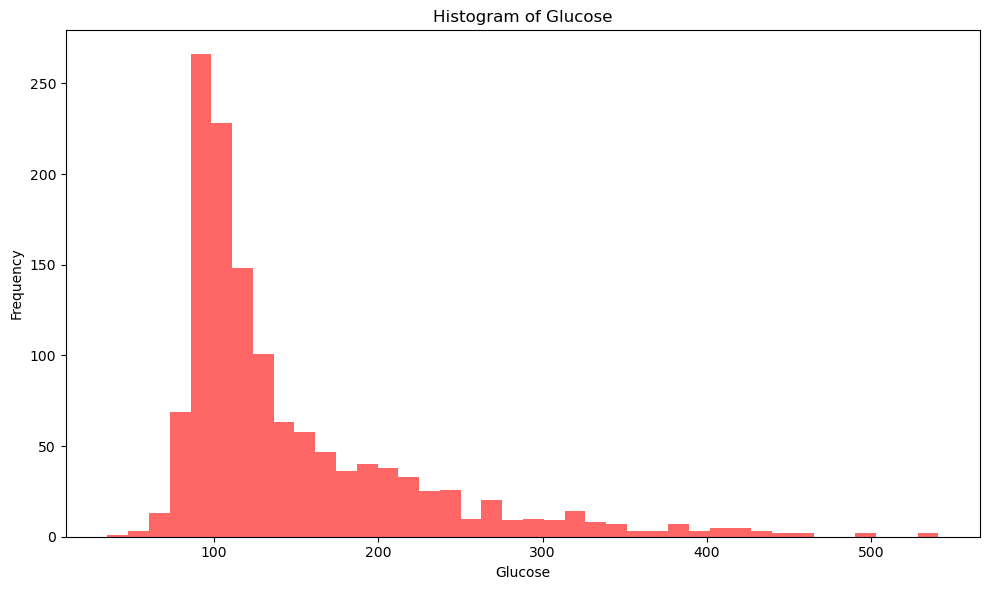

In [17]:
# Plot histogram for 'glucose'
plt.figure(figsize=(10, 6))
plt.hist(heart_data['glucose'], bins=40, color='red', alpha=0.6)
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

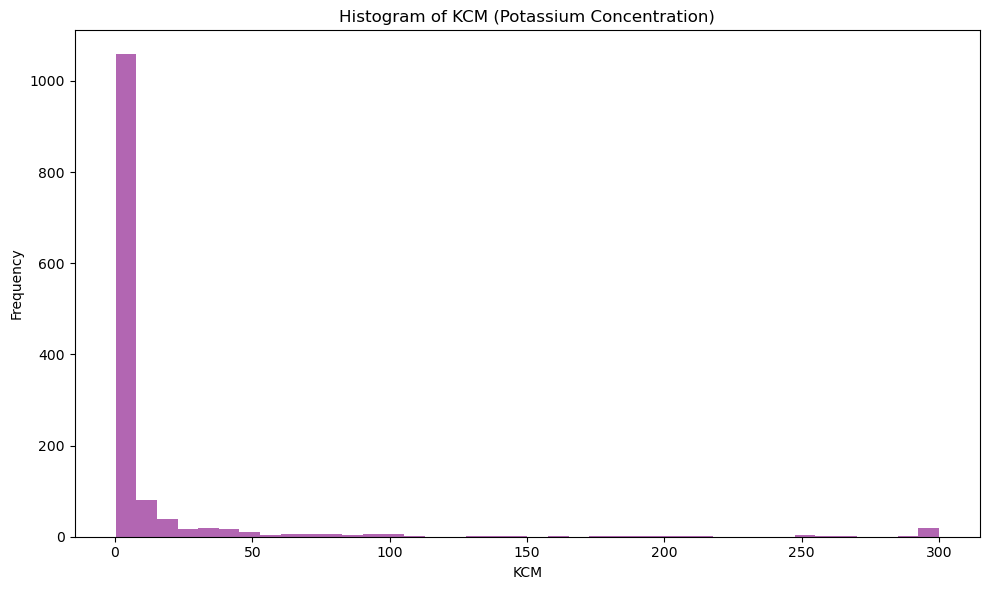

In [23]:
# Plot histogram for 'kcm'
plt.figure(figsize=(10, 6))
plt.hist(heart_data['kcm'], bins=40, color='purple', alpha=0.6)
plt.title('Histogram of KCM (Potassium Concentration)')
plt.xlabel('KCM')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

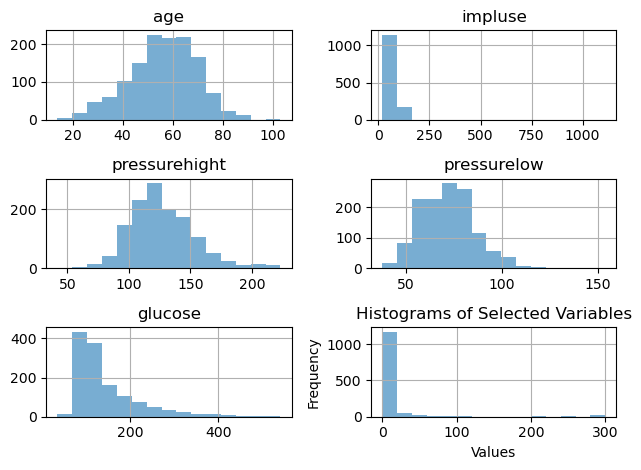

In [26]:
# Plot histograms for selected variables
selected_vars = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm']
plt.figure(figsize=(12, 8))
heart_data[selected_vars].hist(bins=15, alpha=0.6)
plt.title('Histograms of Selected Variables')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

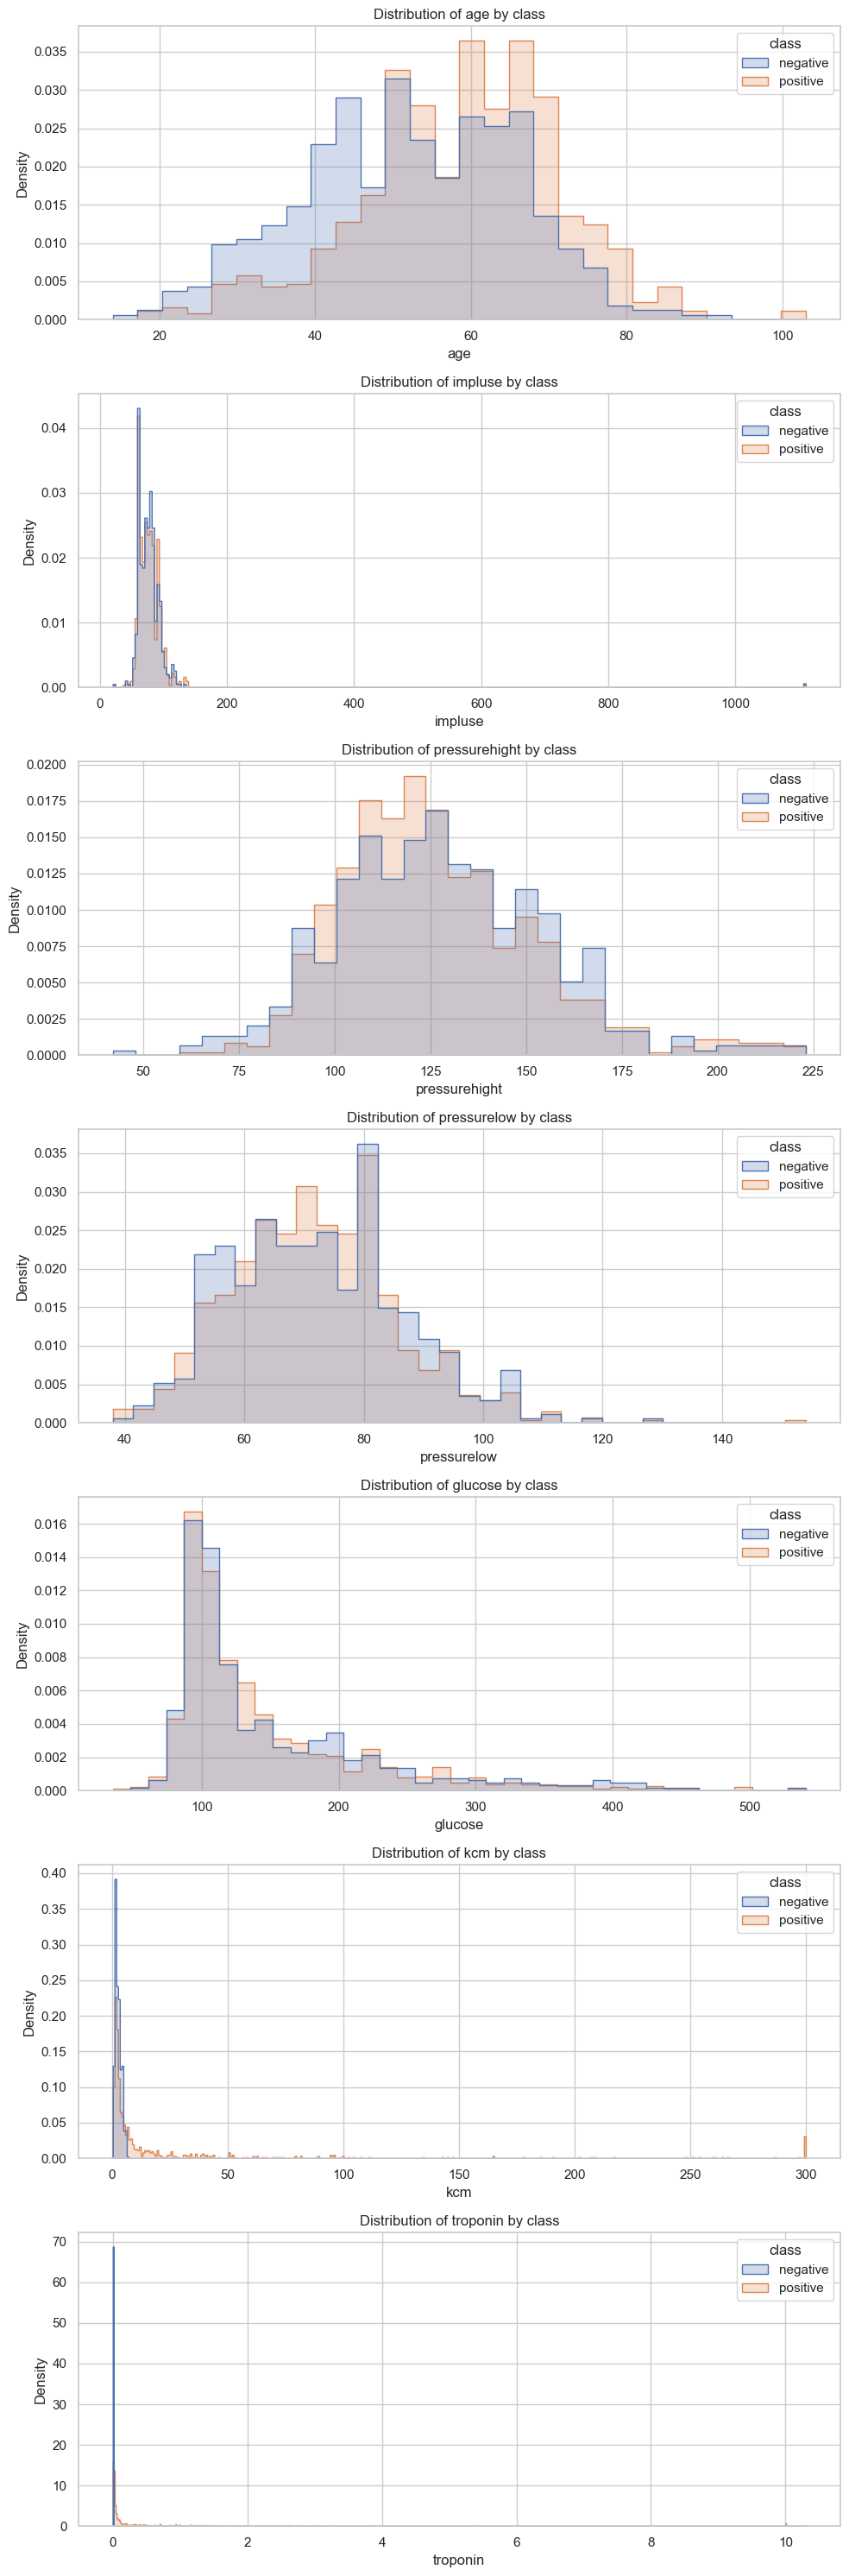

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# List of columns to plot
cols_to_plot = ["age", "impluse", "pressurehight", "pressurelow", "glucose", "kcm", "troponin"]

# Create subplots
fig, axs = plt.subplots(nrows=len(cols_to_plot), figsize=(10, 30))

# Create histogram for each column
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=heart_data, x=col, hue="class", element="step", stat="density", common_norm=False, ax=axs[i])
    axs[i].set_title(f'Distribution of {col} by class')

plt.tight_layout()
plt.show()

In [28]:
# Calculate descriptive statistics for selected variables
selected_vars = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm']
desc_stats = heart_data[selected_vars].describe()

# Display the descriptive statistics
desc_stats


,age,impluse,pressurehight,pressurelow,glucose,kcm
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,78.336619,127.170584,72.269143,146.634344,15.274306
std,13.647315,51.630270,26.122720,14.033924,74.923045,46.327083
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000
max,103.000000,1111.000000,223.000000,154.000000,541.000000,300.000000


In [35]:
# Get unique health classes
health_classes = heart_data['class'].unique()

# Initialize an empty dictionary to store PMF values
pmf_dict = {}

# Iterate through each health class
for health_class in health_classes:
    subset_data = heart_data[heart_data['class'] == health_class]
    pmf_values = subset_data['impluse'].value_counts(normalize=True).sort_index()  # Calculate the PMF values
    pmf_dict[health_class] = pmf_values

# Print the PMF values for each health class
for health_class, pmf_values in pmf_dict.items():
    print(f"PMF values for '{health_class}' health class:")
    print(pmf_values)
    print("\n")

PMF values for 'negative' health class:
20      0.001965
40      0.003929
46      0.001965
51      0.005894
52      0.007859
          ...   
119     0.003929
122     0.001965
125     0.001965
132     0.001965
1111    0.001965
Name: impluse, Length: 66, dtype: float64


PMF values for 'positive' health class:
20      0.001235
36      0.001235
40      0.002469
45      0.001235
49      0.001235
          ...   
125     0.003704
132     0.002469
134     0.003704
135     0.003704
1111    0.002469
Name: impluse, Length: 73, dtype: float64




C:\Users\kpothine\AppData\Local\Temp\ipykernel_17936\744551675.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = heart_data.corr()


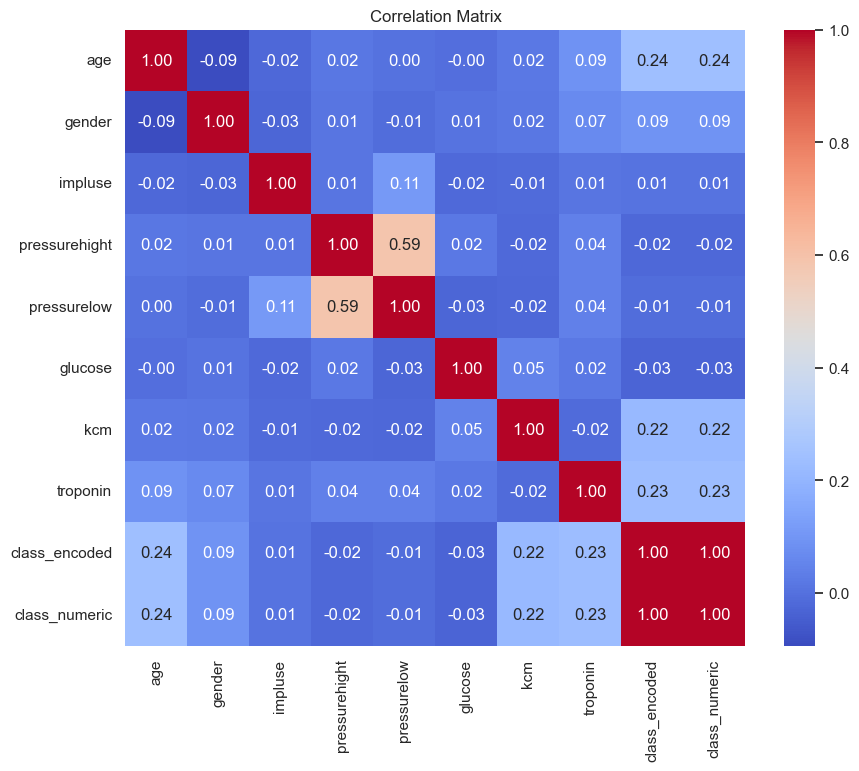

In [70]:
# Convert the class column to numeric for correlation calculation
heart_data['class_numeric'] = heart_data['class'].map({'negative': 0, 'positive': 1})

# Calculate the correlation matrix
corr_matrix = heart_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


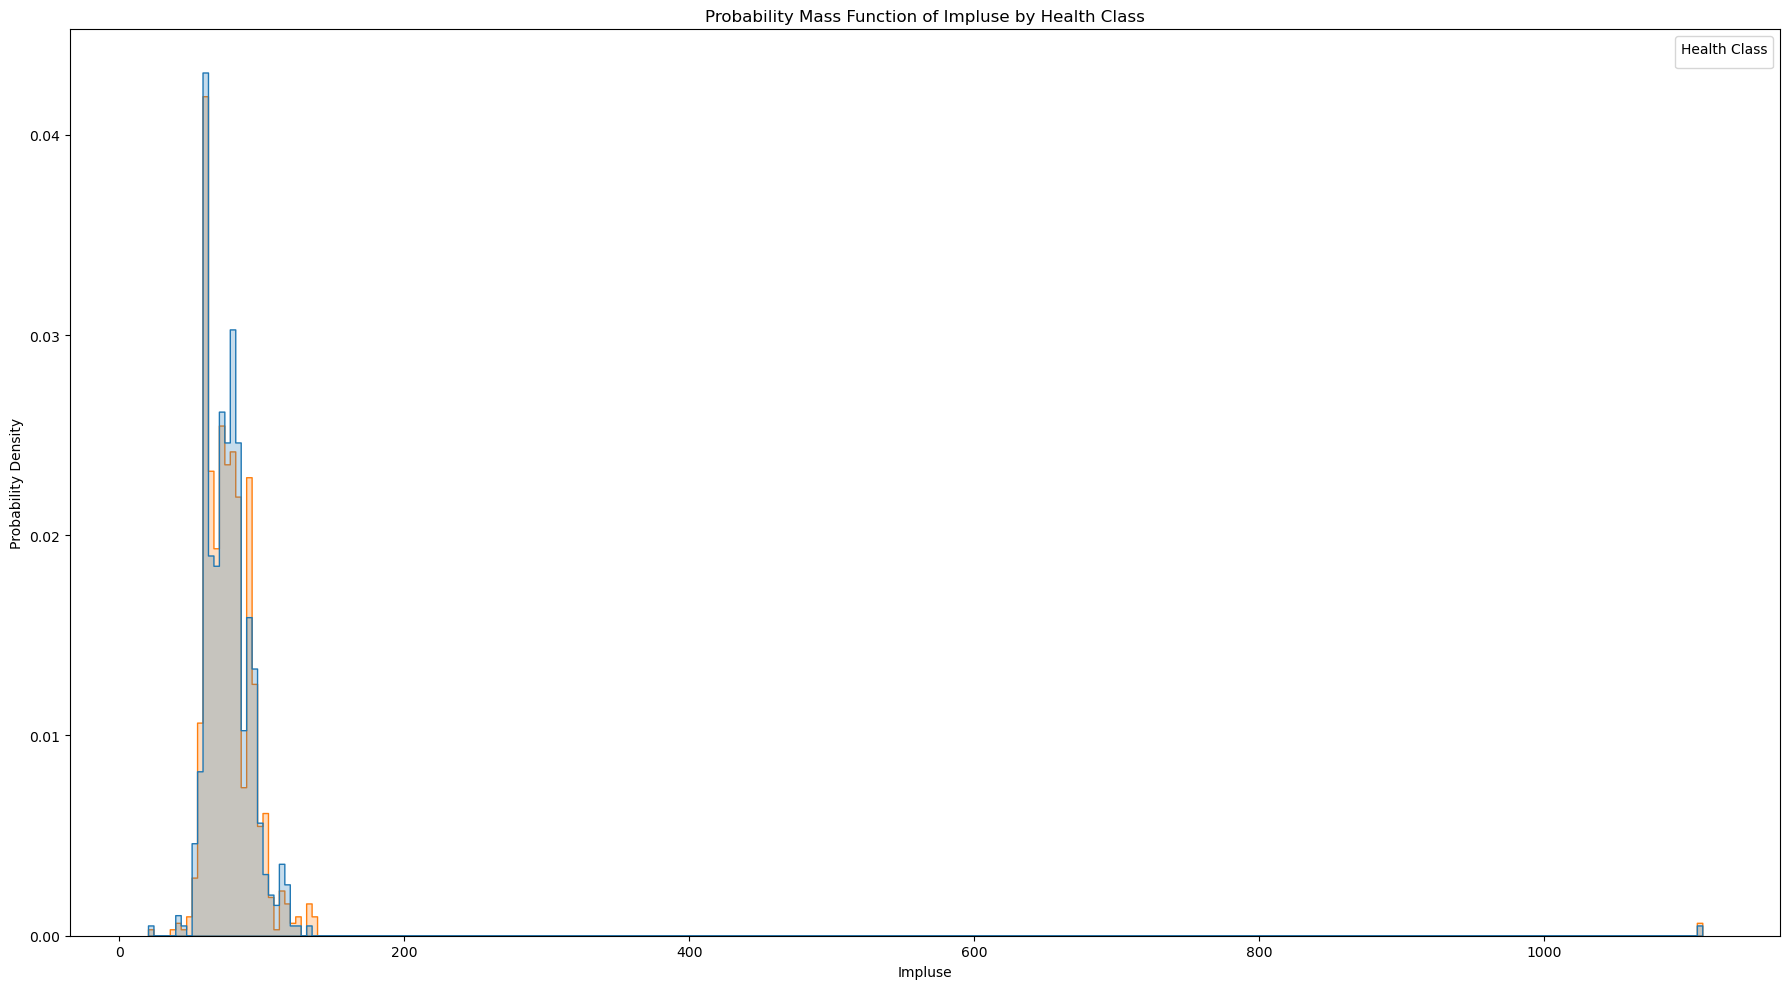

In [36]:
import seaborn as sns

# Create PMF for 'impluse' variable based on health class
plt.figure(figsize=(18, 10))
sns.histplot(heart_data, x='impluse', hue='class', element='step', stat='density', common_norm=False)
plt.title('Probability Mass Function of Impluse by Health Class')
plt.xlabel('Impluse')
plt.ylabel('Probability Density')
plt.legend(title='Health Class')
plt.tight_layout()
plt.show()

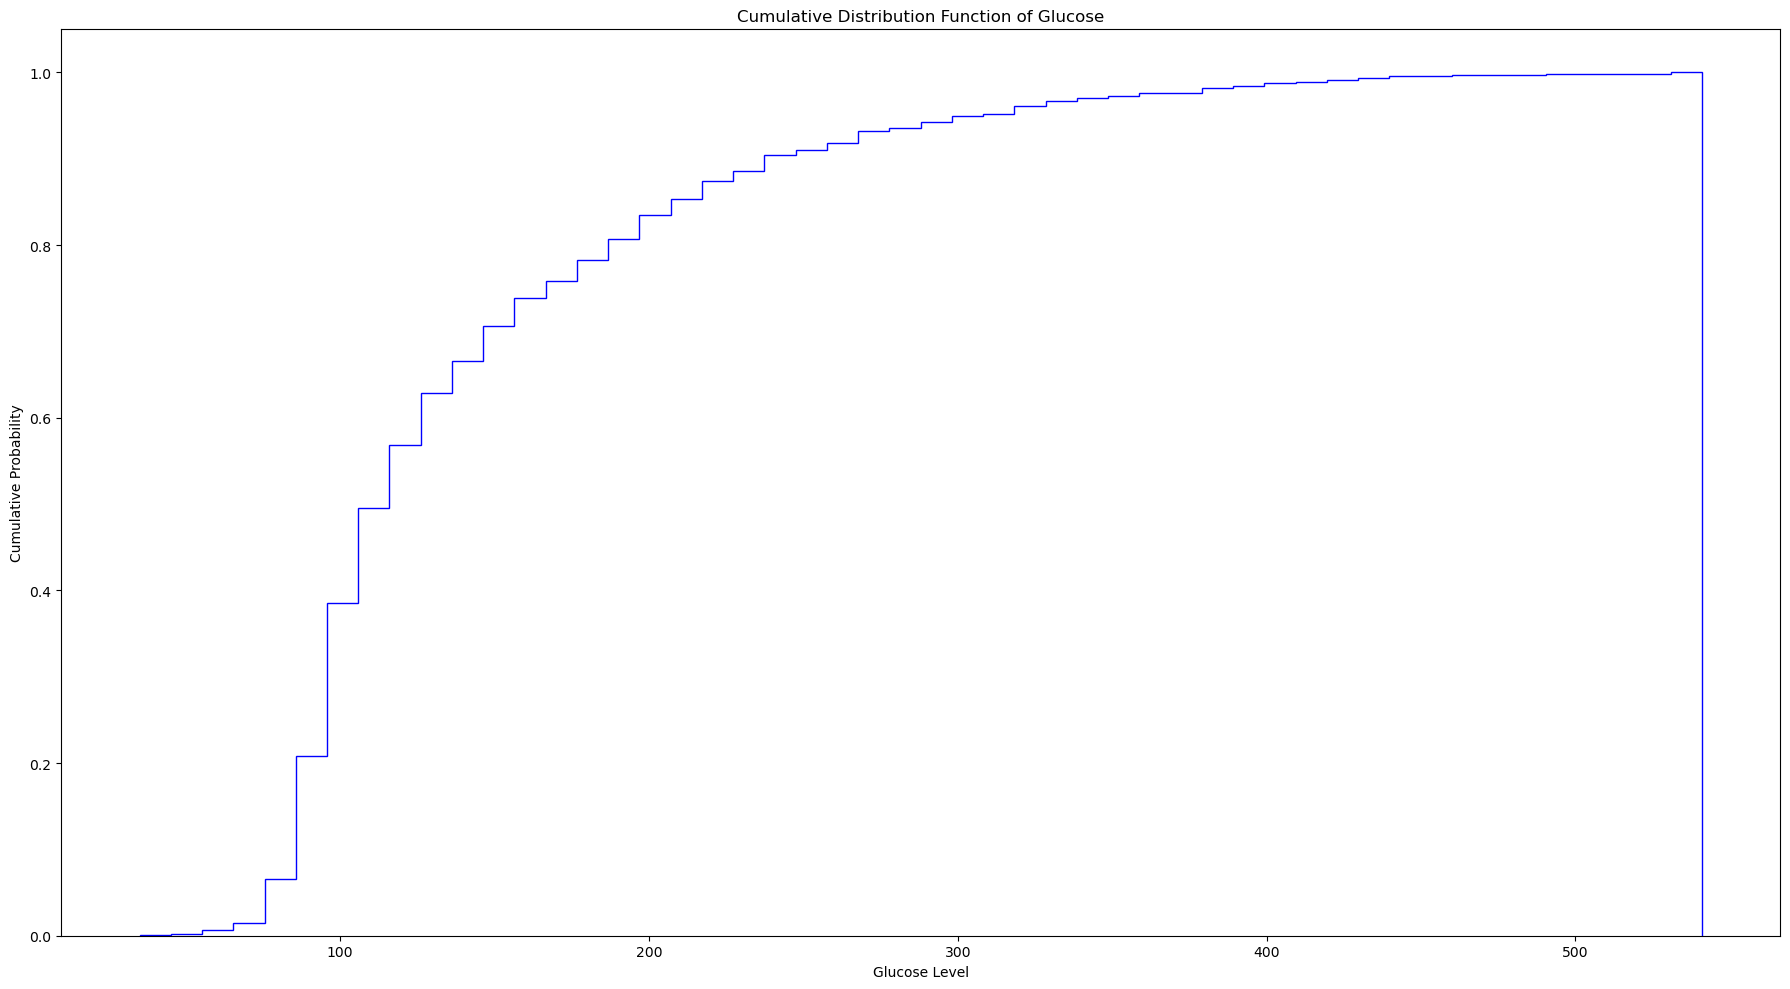

In [38]:
# Create CDF for 'glucose' variable
plt.figure(figsize=(18, 10))
plt.hist(heart_data['glucose'], cumulative=True, density=True, bins=50, histtype='step', color='blue')
plt.title('Cumulative Distribution Function of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()

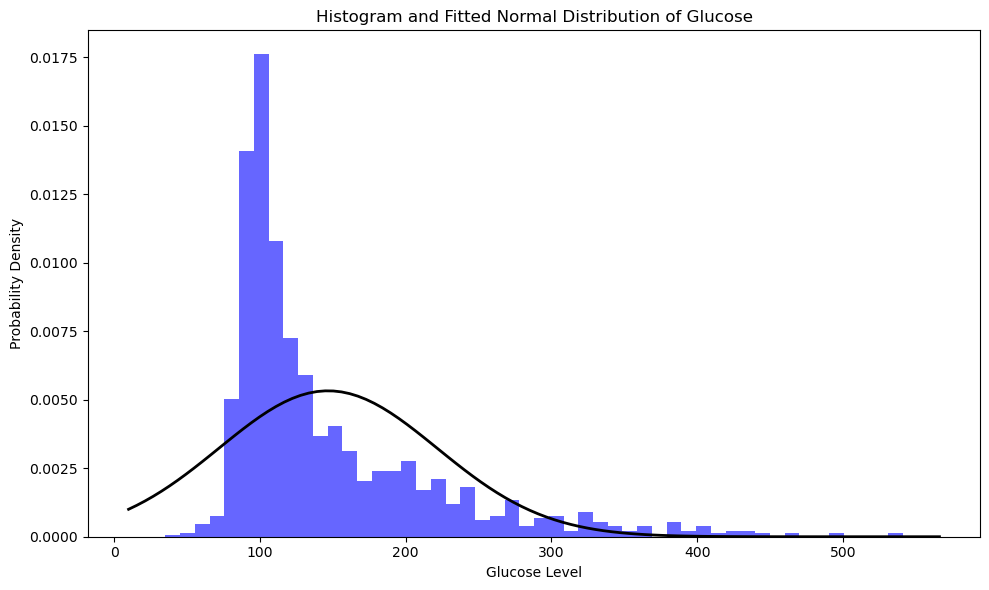

In [40]:
# Analytical Distribution
import scipy.stats as stats

# Fit a normal distribution to 'glucose' variable
glucose_values = heart_data['glucose']
mu, sigma = stats.norm.fit(glucose_values)

# Plot the histogram with fitted normal distribution
plt.figure(figsize=(10, 6))
plt.hist(glucose_values, bins=50, density=True, alpha=0.6, color='blue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histogram and Fitted Normal Distribution of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_vars = ['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm']

heart_data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,health_class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


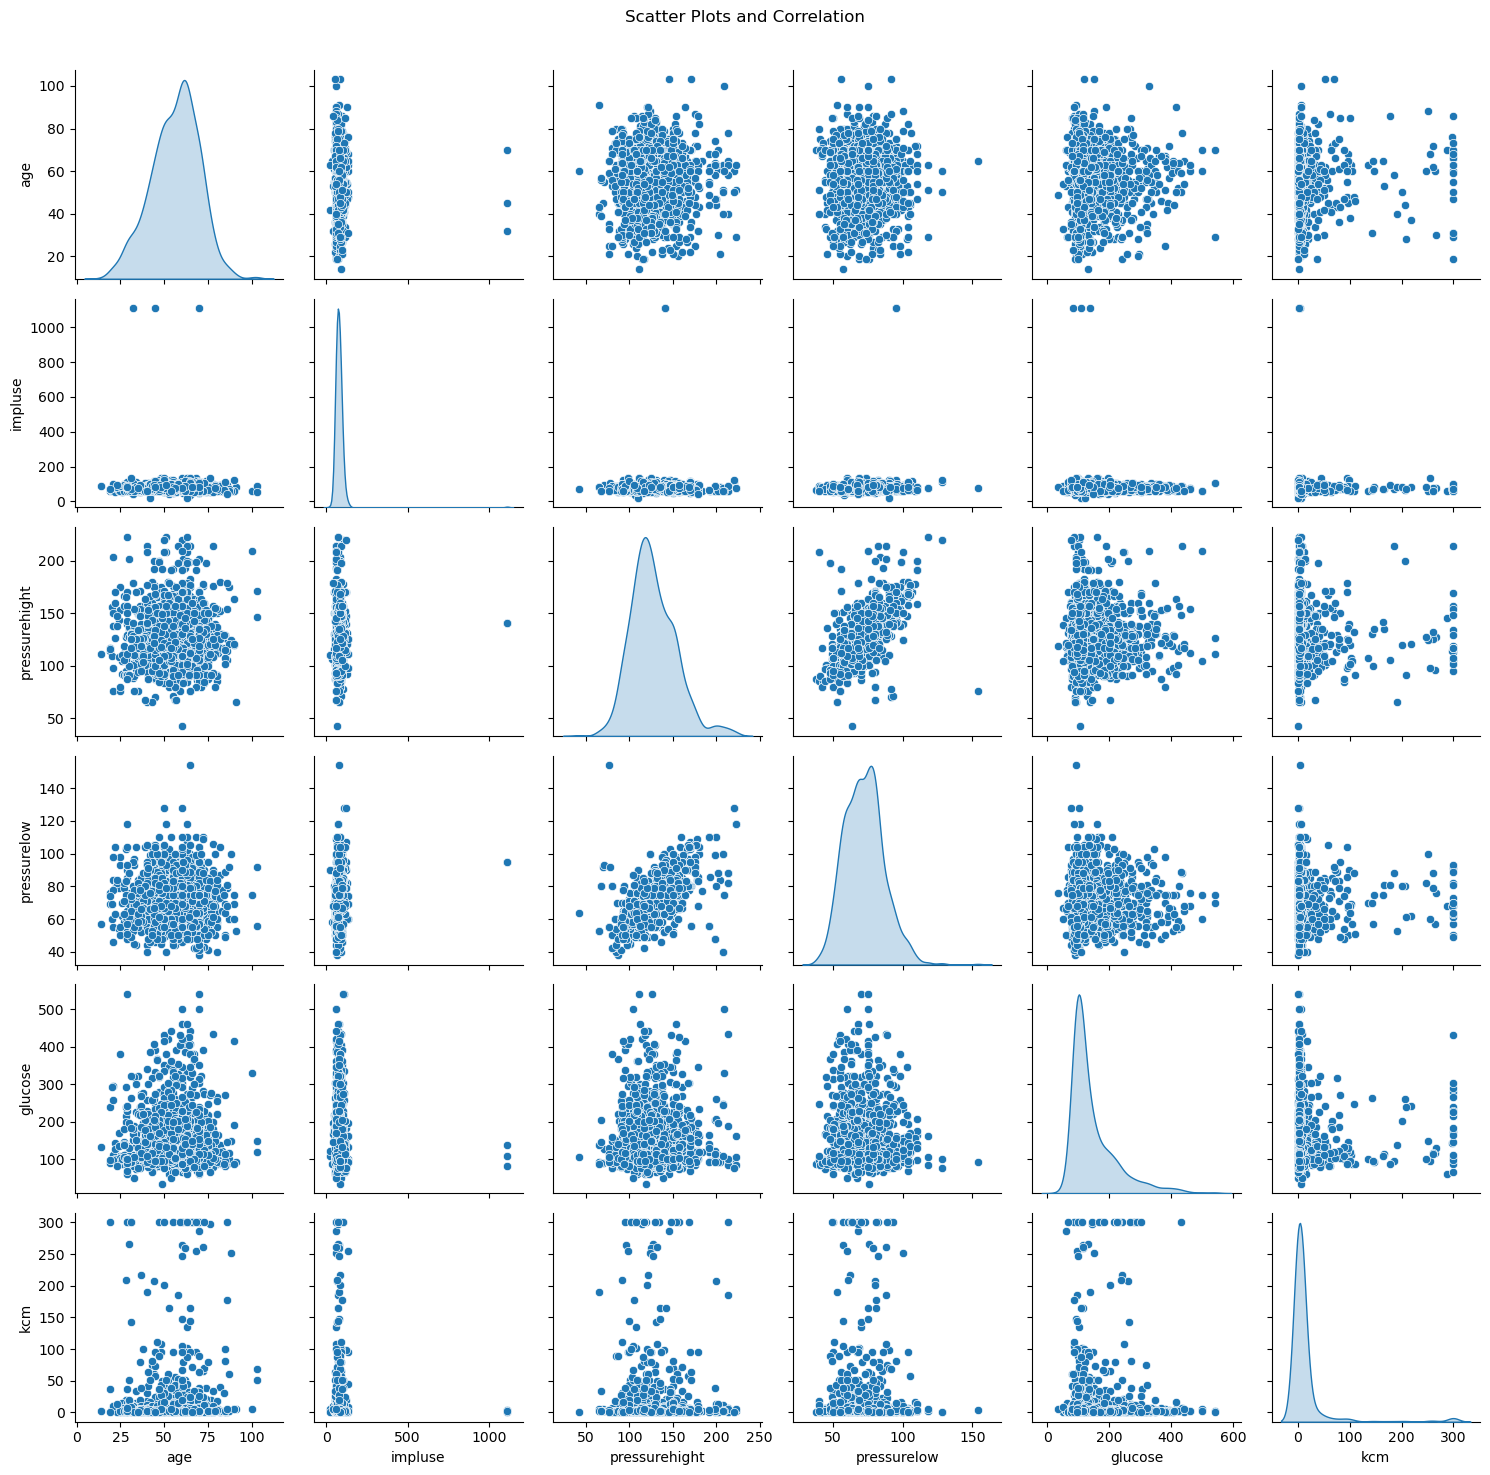

In [56]:
# Create scatter plots for selected variables without hue parameter
sns.pairplot(heart_data[selected_vars], diag_kind='kde')
plt.suptitle('Scatter Plots and Correlation')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [60]:
from scipy.stats import ttest_ind

# Perform a t-test for 'age' between positive and negative health classes
positive_age = heart_data[heart_data['class'] == 'positive']['age']
negative_age = heart_data[heart_data['class'] == 'negative']['age']
t_stat, p_value = ttest_ind(positive_age, negative_age)

print(f'Test Statistic: {t_stat}')
print(f'P-value: {p_value}')


Test Statistic: 8.896506645046744
P-value: 1.8616449551425723e-18


In [64]:
import statsmodels.api as sm

# Encode the dependent variable 'class' as binary values
heart_data['class_encoded'] = heart_data['class'].apply(lambda x: 1 if x == 'positive' else 0)

# Prepare data for regression
X = heart_data[['age', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']]
X = sm.add_constant(X)
y = heart_data['class_encoded']

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display model summary
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.423815
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:          class_encoded   No. Observations:                 1319
Model:                          Logit   Df Residuals:                     1311
Method:                           MLE   Df Model:                            7
Date:                Sun, 06 Aug 2023   Pseudo R-squ.:                  0.3645
Time:                        11:30:33   Log-Likelihood:                -559.01
converged:                       True   LL-Null:                       -879.61
Covariance Type:            nonrobust   LLR p-value:                3.248e-134
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.8327      0.586     -6.540      0.000      -4.981      -2.684
age               0